# Black Jack stylised environment

## Deck Setup 
1. Card Suits : Spades, Hearts, Diamonds and Clubs
2. Face Cards : Kings, Queens and Jacks
3. Ace = Aces
4. Number cards : 2 to 10

# Card value setup

1. Face cards : 10
2. Ace : 11 if bust 1
3. Number : Numerical value equal to their number

# Reward Function

![Cost function](images/cost_function.png)

## Doubts
1. When calculating the score for the hand, when there is unusable ace, should be count that as 1 or 11?
2. How do we score and end the game when there is only one last card left in the deck and still the agent wants to stick?
4. How do I make reward after each state and action, question seems to give reward only after a hand is finished?

In [1]:
import numpy as np
import random

from utils.blackjack_env_builder import BlackJackStylised
from utils.scorer import Scorer, quadratic_scorer
from tqdm import tqdm
from matplotlib import pyplot as plt
from utils.general import plot_Q_values

In [2]:
class MonteCarloES:
    '''
    Monte Carlo Exploring starts algorithm
    '''
    
    # TODO Print the number of states and actions along with the defined init_configurations
    def __init__(self, states, actions, init_config:dict, verbose=False): # reward_function
        
        self.states = states
        self.actions = actions
        self.init_config = init_config
        # self.reward_function = reward_function
        self.initialize_Q_returns()
        
    def epsilon_greedy_policy(self, state):
        
        if random.random() < self.init_config['epsilon']:
            return random.choice(self.actions)
        else:
            return self._exploit(state)
        
    def _exploit(self, state):
        greedy_action = max(list(self.Q[state].keys()),
                                key=lambda x: self.Q[state][x]['value'])
        return greedy_action
        
    
    def initialize_Q_returns(self):
        self.Q = {}
        # self.returns = {}
        for state in self.states:
            action_dict = {}
            for action in self.actions:
                # self.returns[(state, action)] = {'mean':0, 'count':0}
                action_dict[action] = {'value':self.init_config['init_state_action_val'], 
                                       'count':0}
            self.Q[state] = action_dict
            
            
    # TODO Check this function
    def _moving_average_returns(self, state, action, G):
        
        curr_val = self.Q[state][action]['value']
        count = self.Q[state][action]['count']
        
        mov_avg = curr_val + ((G - curr_val)/count+1)
        # mov_avg = (curr_val * count + G)/ count + 1 
        
        return mov_avg
            
        
    def policy_evaluation(self, episode):
        
        # Starting from reverse order for policy evaluation
        # for episode in episodes:
        state_repeat_check = []
        G = 0
        for state, action, reward in reversed(episode):

            # TODO Check if returns are right
            G = self.init_config['gamma']*G + reward

            if (state, action) not in state_repeat_check:
                state_repeat_check.append((state, action))
                self.Q[state][action]['count'] += 1
                self.Q[state][action]['value'] = self._moving_average_returns(state, action, G)
            

## For infinite Decks

In [10]:
env = BlackJackStylised()

In [11]:
init_config= {'init_state_action_val': 0,
              'epsilon' : 0.25,
              'gamma' : 0.8}
agent_v1 = MonteCarloES(states=list(range(2, 22)), actions=[0, 1],
                        init_config=init_config)

In [12]:
cards, curr_sum, usable_ace, hand_complete = env.reset_init(hard=True)
total_episodes = 1000000
episode_break_flag = True

if not hand_complete:
    # episodes = []
    for i in tqdm(list(range(total_episodes))):
        episode = []
        episode_break_flag = True
        while episode_break_flag:
            action = agent_v1.epsilon_greedy_policy(curr_sum)
            cards, new_sum, usable_ace, hand_complete = env.step(action)
            
            reward = quadratic_scorer(new_sum)
            episode.append([curr_sum, action, reward])
            curr_sum = new_sum
            
            if curr_sum > 21:
                episode_break_flag = False
            elif hand_complete:
                episode_break_flag = False
                
        agent_v1.policy_evaluation(episode)
        # episodes.append(episode)
        cards, curr_sum, usable_ace, hand_complete = env.reset_init()

100%|██████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:42<00:00, 9787.71it/s]


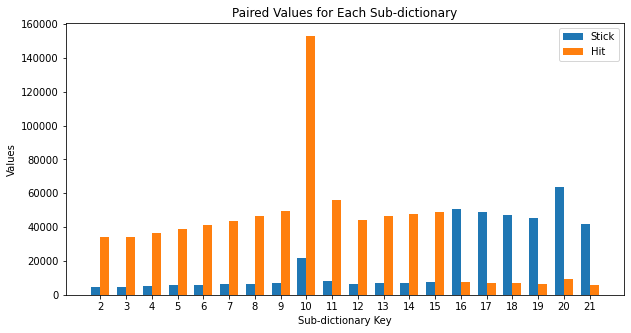

In [13]:
plot_Q_values(agent_v1.Q)

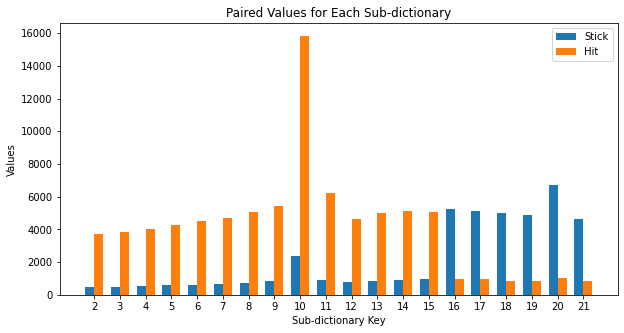

In [9]:
plot_Q_values(agent_v1.Q)

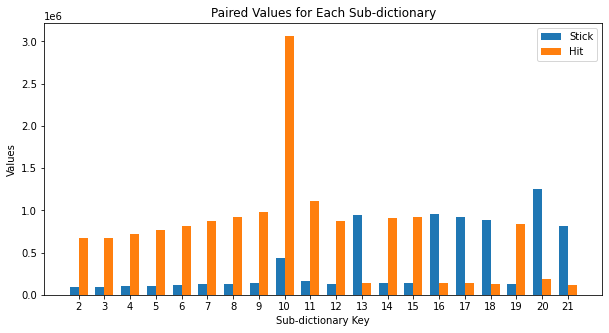

In [16]:
plot_Q_values(agent_v1.Q)